# Desviación estándar, distribución normal y estaturas
Séptimo día. Veamos conceptos básicos de estadística, siempre necesarios en el análisis de datos, y desarrollemos un pequeño proyecto. Vamos a profundizar un poco en la desviación estándar y la distribución normal. La desviación estándar es una medida estadística que indica qué tan dispersos o alejados están los datos respecto a su media. Por su parte, la distribución normal, también conocida como distribución de Gauss o distribución gaussiana, es una distribución que tiene forma de campana simétrica alrededor de su media. Todo esto lo vamos a representar gráficamente en _Python_ para que se comprenda bien mientras desarrollamos un pequeño proyecto. Éste girará alrededor un _DataFrame__ con la estatura de 1000 personas. _Let's go, baby_.

## La estatura de 1000 personas
Analicemos la estatura de 1000 personas y la desviación estándar, así como su distribución. Crearemos, explicaremos y visualizaremos datos para comprender cuándo estas herramientas nos permiten distinguir patrones y anomalías. Primero necesitamos los datos simulados. 

In [1]:
# Los  sospechosos habituales: pandas, numpy y matplotlib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Simular estaturas en cm (media=170, sigma=7)
np.random.seed(42) # Semilla aleatoria marcada con el número 42 para obtener resultados replicables.
estaturas = np.random.normal(loc=170, scale=7, size=1000) # Cien datos de estaturas alrededor de 170 con una desviación estándar de 7.
df = pd.DataFrame({'Estatura': estaturas}) # Aquí estamos convirtiendo los datos en una tabla.

# Impresiones de comprobación.
print(f"Media de estatura: {df['Estatura'].mean():.2f}.")
print(f"Desviación estándar: {df['Estatura'].std():.2f}.")


Media de estatura: 170.14.
Desviación estándar: 6.85.


La estatura promedio es de 170.14 centímetros y la desviación estándar es de 6.85. ¿Por qué el número de la desviación estándar parece estar en centímetros? Porque lo está; se expresa en las mismas unidades que los datos originales. Esto quiere decir que en promedio, las estaturas individuales se apartan de la media por unos 6.85 cm. La desviación estándar es, digamos, un valor intuitivo y fácil de interpretar.

Ya tenemos la información necesaria y conocemos su desviación estándar. Ahora vamos a ver si se trata de una distribución normal.

## Histograma de la estaturas
Con los histogramas podemos comprobar la distribución de los datos. ¿Se trata de una distribución normal, con nuestros datos agrupados alrededor de la media? 

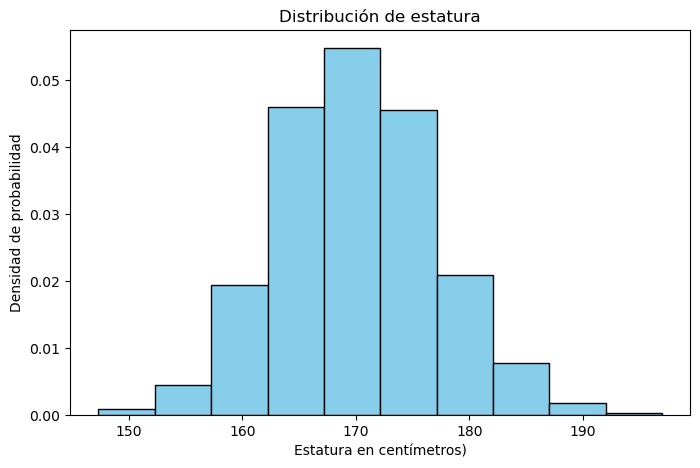

In [2]:
# Histograma y curva normal ajustada.
plt.figure(figsize=(8,5))
plt.hist(df['Estatura'], bins=10, density=True, color='skyblue', edgecolor='black')

# Título, etiquetas e impresión.
plt.title('Distribución de estatura')
plt.xlabel('Estatura en centímetros)')
plt.ylabel('Densidad de probabilidad')
plt.show()


## Análisis y explicación

Qué sorpresa. Sí se trata de una distribución normal, con forma de campana. Como podemos ver, la mayoría los datos se encuentran alrededor de la media. La desviación estándar de 6.85 cm nos indica que la mayoría de las alturas están en un rango que inicia 6.85 cm por debajo de la media y que termina 6.85 cm por arriba de la media de 170.14 cm. Aproximadamente un 68% de las estaturas deben estar en este rango en una distribución normal.

Entonces ya tenemos clara la media y las estaturas que podríamos considerar 'normales' dentro de nuestro _DataFrame_. ¿Qué estaturas podríamos considerar como _outliers_? Pues si consideramos que en una distribución normal, casi todos los datos se encuentran dentro del rango de la media más/menos tres desviaciones estándar, cuando un dato está fuera de ese rango, se considera un valor extremadamente raro o atípico (_outlier_).

In [3]:
# la media y la desviación estándar.
media = df['Estatura'].mean()
std = df['Estatura'].std()

# Definición de límites para outliers: fuera de ±3 desviaciones estándar
limite_inferior = media - 3 * std
limite_superior = media + 3 * std

print(f"El límite inferior para outliers es de {limite_inferior:.2f} cm.")
print(f"Límite superior para outliers es de {limite_superior:.2f} cm.")

El límite inferior para outliers es de 149.57 cm.
Límite superior para outliers es de 190.70 cm.


Así que ésas estaturas son los límites que indican valores raros. ¿Entonces cuántos valores raros tenemos?

In [4]:
# Filtrar estaturas que son outliers.
outliers = df[(df['Estatura'] < limite_inferior) | (df['Estatura'] > limite_superior)]

print("Estaturas consideradas outliers:")
print(outliers)

Estaturas consideradas outliers:
       Estatura
209  196.969120
262  147.311129
478  191.552166


Solamente tenemos tres valores atípicos.

## Conclusión

Que hayamos seleccionado estaturas para este proyecto no es una coincidencia. Fenómenos naturales o sociales suelen seguir una distribución normal. Algunos ejemplos son: edades y estaturas de una población, temperaturas promedio a nivel mensual, resultados de exámenes, presión arterial, etc.

Tal vez te preguntes, ¿entonces que otros tipos de distribuciones hay? Eso lo veremos en siguientes entregas. _Stay tuned!_